In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS0_K273_ONLINE_TonNuKhanhQuynh/Cung_cap_HV/'

/content/gdrive/My Drive/LDS0_K273_ONLINE_TonNuKhanhQuynh/Cung_cap_HV


In [3]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=387fbeaea9f34313d09b5c99c5aad7b6e4280652d849328550f91ba676fd0815
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import import_ipynb
from Lib_Evaluation_Classification_Model import *

importing Jupyter notebook from Lib_Evaluation_Classification_Model.ipynb


### Load data

In [5]:
data = pd.read_csv("data_Foody_pre.csv")

In [6]:
data = data[['restaurant', 'review_score', 'review_text_t1']]
data.head()

,restaurant,review_score,review_text_t1
0,Good Morning Restaurant,8.2,hải_sản ghé rẻ đẹp
1,Hạt Dẻ Trùng Khánh,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...
2,Bột - Healthy & Weight Loss Food - Shop Online,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử
3,Bánh Giò Chợ Nguyễn Công Trứ,8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...
4,Quán Quảng - Bún Quảng,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38676 entries, 0 to 38675
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   restaurant      38676 non-null  object 
 1   review_score    38676 non-null  float64
 2   review_text_t1  38676 non-null  object 
dtypes: float64(1), object(2)
memory usage: 906.6+ KB


### Data Preparation

In [8]:
# Process target data
data['target'] = 0 # negative
data['target'][data['review_score']>7] = 2 # positive
data['target'][(data['review_score']>=5)&(data['review_score']<=7)] = 1 # neutral

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
data.head()

,restaurant,review_score,review_text_t1,target
0,Good Morning Restaurant,8.2,hải_sản ghé rẻ đẹp,2
1,Hạt Dẻ Trùng Khánh,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...,2
2,Bột - Healthy & Weight Loss Food - Shop Online,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử,2
3,Bánh Giò Chợ Nguyễn Công Trứ,8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...,2
4,Quán Quảng - Bún Quảng,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...,2


In [10]:
# Resampling using resample
from sklearn.utils import resample

In [11]:
df_0 = data[data['target'] == 0]
df_1 = data[data['target'] == 1]
df_2 = data[data['target'] == 2]

In [12]:
f_0_resample = resample(df_0, replace=True, n_samples=17600, random_state=0)
f_2_resample = resample(df_2, replace=False, n_samples=16600, random_state=0)
data = pd.concat([f_0_resample, f_2_resample,df_1])

In [13]:
# Process text data
source = data['review_text_t1']
type(source)

pandas.core.series.Series

In [14]:
text_data = np.array(source)
text_data

array(['phục_vụ kém chờ đắt bàn đồ_ăn bàn quan_sát',
       'nhấn chửi đông đứng đợi nhấn nhấn quăg điện_thoại chỏng_chơ chả khổ_sở lắm tích không_tích chửi điện_thoại cười đợi đông kịp trả_lời hèn không_thì bụg lập giả điên',
       'đừng mỳ thơm sốt tí lỡ hẳn đen không_giờ dẹp', ...,
       'kêu đắng hơi lạ ngâm thích quất tỏi quắt kèm trụng sôi mỳ phục_vụ lắm hix kêu lá_sách trừ chậm phục_vụ đông',
       'xào gỏi đồ_ăn xào hơi nhạt hơi hôi nhẹ gỏi hơi cứng mềm xíu hơi',
       'bạch công_việc ghé vô uống chờ rước lý_tưởng mát_mẻ tệ không_chuyên_nghiệp phục_vụ đợi uống kêu toán uống bình_thường tạm mắc hơi'],
      dtype=object)

In [15]:
count = CountVectorizer(max_features=3500) 
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<38665x3500 sparse matrix of type '<class 'numpy.int64'>'
	with 372668 stored elements in Compressed Sparse Row format>

In [16]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X.shape

(38665, 3500)

In [18]:
data.groupby('target').review_text_t1.count()

target
0    17600
1     4465
2    16600
Name: review_text_t1, dtype: int64

In [19]:
y = np.array(data['target'])

In [20]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Train model

In [21]:
import time
t0 = time.time()
model = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None) # Perceptron
model.fit(X_train, y_train)
t1 = time.time()
print("Fit time:", t1-t0)

Fit time: 13.999207496643066


In [ ]:
y_hat= model.predict(X_test)

### Evaluate model

In [22]:
print('Train score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))

Train score:  0.8507694297167981
Test score:  0.7894736842105263


In [23]:
score, recall, precision, f1 = Static_score_model_class(y_train, model.predict(X_train),'macro')
print('Score:', score)
print('Recall:', recall)
print('Precision:', precision)
print('f1:', f1)

Score: 0.8507694297167981
Recall: 0.7573465299665346
Precision: 0.7850846784499836
f1: 0.7681466877630716


In [24]:
score, recall, precision, f1 = Static_score_model_class(y_test, model.predict(X_test),'macro')
print('Score:', score)
print('Recall:', recall)
print('Precision:', precision)
print('f1:', f1)

Score: 0.7894736842105263
Recall: 0.6655141790806326
Precision: 0.6773390000867433
f1: 0.6691628316018333


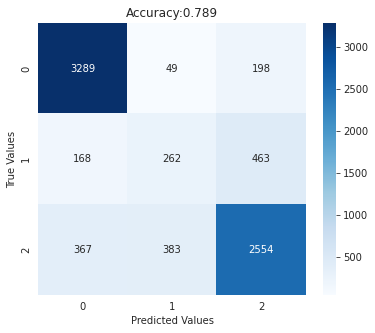

In [25]:
Visualize_confusion_matrix(y_test, model.predict(X_test))